# Linear Regression on Wine Dataset.

We have the Wine Quality dataset from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). The goal is to model wine quality based on physicochemical tests.

In [214]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

In [215]:
col_name = ['class' , 'Alcohol' , 'Malic acid' , 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids'
            ,'Nonflavanoid phenols' , 'Proanthocyanins' , 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

df = pd.read_csv('wine.data', delimiter=',', names = col_name)

def pl(x):
  return x-1

df['class']=df['class'].apply(pl)
df


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [216]:
df.dtypes

class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [217]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [218]:
# Data to numpy arrays
X = df.iloc[:, 1:14].to_numpy().astype(np.float32)
y = df.iloc[:, 0].to_numpy()

X[:10], y[:10]

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
         3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
         1.185e+03],
        [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
         3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
         1.480e+03],
        [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
         2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
         7.350e+02],
        [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
         3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e

In [219]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
# Converting data to tensors.
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [222]:
X_train.shape, y_train.shape

(torch.Size([142, 13]), torch.Size([142]))

In [223]:
# Creating linear regression model
model = nn.Linear(13, 1)
model.state_dict()  # Shows model parameters

OrderedDict([('weight',
              tensor([[ 0.1526,  0.0701,  0.1201, -0.0369,  0.2431,  0.1078, -0.2613, -0.2034,
                       -0.1580, -0.0736, -0.1802,  0.2724, -0.0203]])),
             ('bias', tensor([-0.1421]))])

In [224]:
# Setting up loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.7)

In [225]:
# Training
EPOCHS = 200
train_losses = []
test_losses = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model.train()

  # Forward Propagation
  y_pred = model(X_train).squeeze(dim=1)

  # Loss Value
  loss = loss_fn(y_pred, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test).squeeze(dim=1)
    test_loss = loss_fn(test_preds, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 2.1463704109191895 | Test Loss: 1.6607295274734497
Epoch: 10 | Train Loss: 0.5687845349311829 | Test Loss: 0.4849829077720642
Epoch: 20 | Train Loss: 0.18478628993034363 | Test Loss: 0.167888343334198
Epoch: 30 | Train Loss: 0.10032538324594498 | Test Loss: 0.1029556542634964
Epoch: 40 | Train Loss: 0.07796759903430939 | Test Loss: 0.08295799791812897
Epoch: 50 | Train Loss: 0.06971626728773117 | Test Loss: 0.0746263787150383
Epoch: 60 | Train Loss: 0.0656052678823471 | Test Loss: 0.07041802257299423
Epoch: 70 | Train Loss: 0.06316128373146057 | Test Loss: 0.06816984713077545
Epoch: 80 | Train Loss: 0.06157774478197098 | Test Loss: 0.066989466547966
Epoch: 90 | Train Loss: 0.06050780043005943 | Test Loss: 0.06642048060894012
Epoch: 100 | Train Loss: 0.05976885184645653 | Test Loss: 0.06620566546916962
Epoch: 110 | Train Loss: 0.05925217643380165 | Test Loss: 0.06619405746459961
Epoch: 120 | Train Loss: 0.05888822674751282 | Test Loss: 0.06629517674446106
Epoch: 1

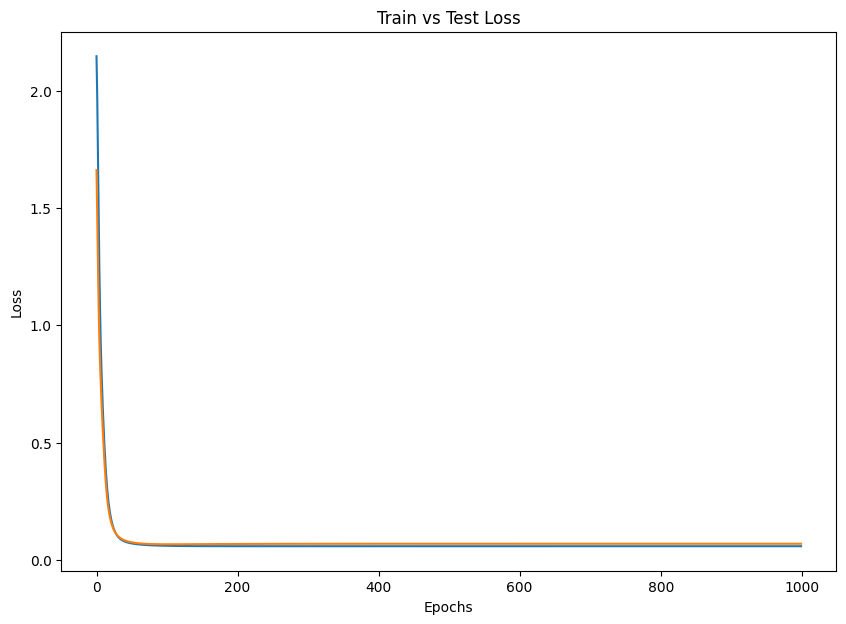

In [226]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

In [227]:
# Accuracy Function for evaluation.
def acc_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds.squeeze()).sum().item()
  # print(torch.eq(y_true, y_preds.squeeze()).shape)
  # print(y_true.shape)
  acc = correct / len(y_preds)
  return acc*100

In [228]:
# Making predictions with our model
model.eval()
with torch.inference_mode():
  preds = model(X_test)
  preds = torch.round(preds)
print(f'Test Accuracy: {acc_fn(y_test, preds)}')

Test Accuracy: 91.66666666666666
